## Data Analysis - Retail Data

In this project, you'll serve as a data analyst at an online retail company helping interpret real-world data to help make key business decisions. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular product.

Import required modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Let's Read the dataset.

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.shape

(541909, 8)

Our dataset contains 541909 entries and 8 columns. Lets check the data type of each column.

In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Lets check for any missing data in our dataset. 

In [6]:
missing_data = df.isnull()
missing_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print(" ")

InvoiceNo
False    541909
Name: count, dtype: int64
 
StockCode
False    541909
Name: count, dtype: int64
 
Description
False    540455
True       1454
Name: count, dtype: int64
 
Quantity
False    541909
Name: count, dtype: int64
 
InvoiceDate
False    541909
Name: count, dtype: int64
 
UnitPrice
False    541909
Name: count, dtype: int64
 
CustomerID
False    406829
True     135080
Name: count, dtype: int64
 
Country
False    541909
Name: count, dtype: int64
 


Number of missing data in columns:

CustomerID = 135080

Description = 1454

Let's plot a histplot for CustomerID column to check the unique ID count.

<Axes: xlabel='CustomerID', ylabel='Count'>

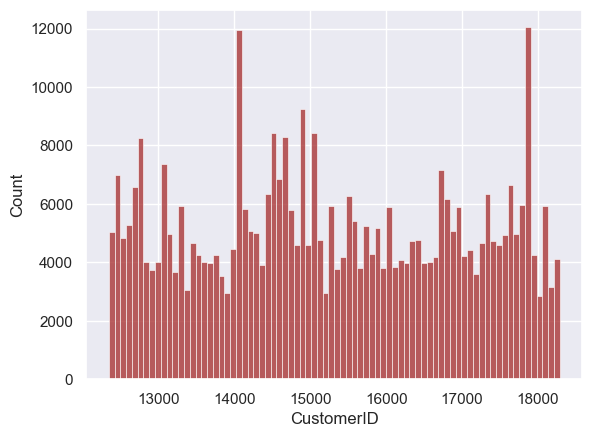

In [8]:
sns.histplot(df['CustomerID'], color ='brown')

There are many unique Customer IDs and their count is also random so it is better to drop all the rows with missing CustomerIDs.

In [9]:
df['CustomerID'].isnull().sum()

135080

Let's replace the empty cells with np.NaN values, so we can drop these empty enteries with **dropna** funtion.

In [10]:
df1 = df.replace(" ", np.NaN)

In [11]:
df =df1.dropna(subset='CustomerID', axis =0)
df.reset_index(drop =True, inplace =True)
df.shape

(406829, 8)

In [12]:
print("Number of rows before dropping missing values = 541909")
print("Number of rows after dropping missing data from the column Customer ID =", 541909 - 135080) # total rows minus number of empty rows

Number of rows before dropping missing values = 541909
Number of rows after dropping missing data from the column Customer ID = 406829


In [13]:
missing_data = df.isnull().value_counts()
missing_data

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
False      False      False        False     False        False      False       False      406829
Name: count, dtype: int64

Now there are no missing values in our dataset. Missing data from Description column has also been removed when we removed missing data from CustomerID column. 

Lets check the shape of our dataset.

In [14]:
df.shape

(406829, 8)

Now we should check for any duplicate values in our dataset. These duplicate values need to be removed.

In [15]:
df.drop_duplicates(keep ='last')
df.shape

(406829, 8)

The shape of our dataset remains the same so there were no duplicate values.

Lets check the datatype of each column before proceeding further. 

In [16]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [18]:
df['Quantity'].value_counts()

Quantity
 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: count, Length: 436, dtype: int64

We observe that there are some negative values in Quantity column. We can convert all the values in the column to positive values using **abs()** function.

In [19]:
df['Quantity'] = df['Quantity'].abs()

C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\2038587808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].abs()


In [20]:
df['Quantity'].value_counts()

Quantity
1      77162
12     60553
2      59332
6      38156
4      32638
       ...  
164        1
588        1
188        1
147        1
157        1
Name: count, Length: 310, dtype: int64

In [21]:
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,406829.000000,406829.000000
mean,3.460471,13.412279
std,69.315162,248.624170
min,0.000000,1.000000
25%,1.250000,2.000000
50%,1.950000,5.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


We see that there are few transections with UnitPrice =0.000. We need to drop these entries from our dataset.

In [22]:
df2 =df.replace(0, np.NaN)
df =df2.dropna(subset='UnitPrice', axis =0)
df.reset_index(drop=True, inplace=True)
df.shape

(406789, 8)

Shape before drop: (406829,8)

Shape after drop: (406789,8)

In [23]:
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,406789.000000,406789.000000
mean,3.460811,13.379467
std,69.318561,247.858601
min,0.001000,1.000000
25%,1.250000,2.000000
50%,1.950000,5.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


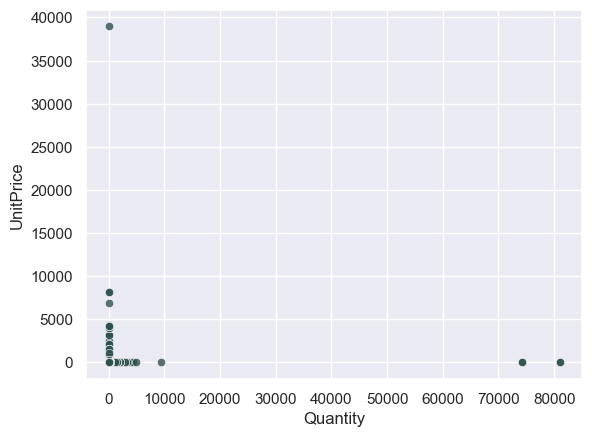

In [28]:
sns.scatterplot(data =df, x ='Quantity', y ='UnitPrice', color ='darkslategrey', alpha =0.8)
plt.show()

### We can observe some outliers in UnitPrice and Quantity column. Let's deal with the outliers first. 

BoxPlot is ithe best way to check the outliers.

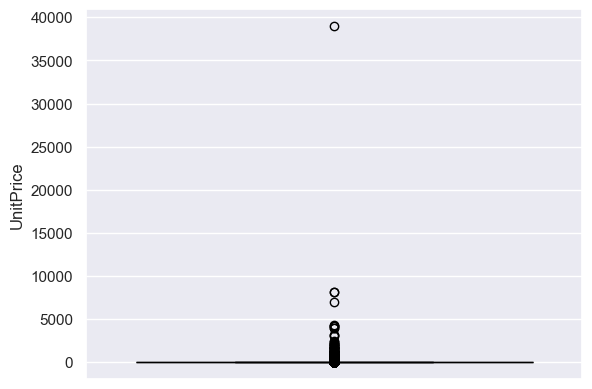

In [29]:
sns.boxplot(df['UnitPrice'], color ='black')
plt.show()

In [30]:
df['UnitPrice'].describe()

count    406789.000000
mean          3.460811
std          69.318561
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

We observe that the max value is exceptionally high.

Let's calculate the mean for the UnitPrice Column and replace the outlier values with the mean.

In [31]:
Q1 =df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

In [32]:
IQR = Q3- Q1
IQR

2.5

In [33]:
lower_lim = Q1 -1.5 *IQR
lower_lim

-2.5

In [34]:
upper_lim = Q3 +1.5 *IQR
upper_lim

7.5

Our Upper boundry is 7.5 and our lower boundry is -2.5. This means that the values between -2.5 and 7.5 are acceptable but those outside this limit are outliers. So we can replace the outlier values with mean of the column i.e 3.46.

In [35]:
for values in df['UnitPrice']:
    if values > 7.5:
        df['UnitPrice'] = df['UnitPrice'].replace(values, 3.46)
        
df['UnitPrice'].describe()   

C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\2976268542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice'] = df['UnitPrice'].replace(values, 3.46)


count    406789.000000
mean          2.259770
std           1.515465
min           0.001000
25%           1.250000
50%           1.950000
75%           3.460000
max           7.500000
Name: UnitPrice, dtype: float64

[]

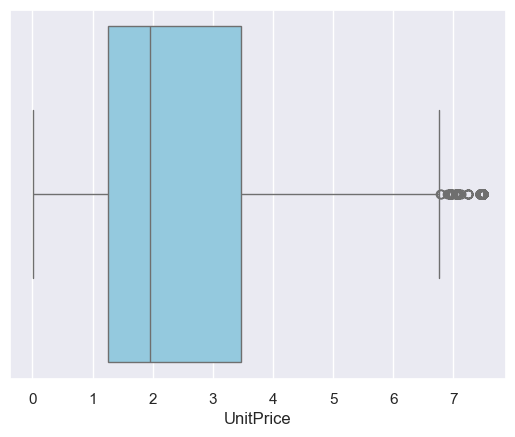

In [36]:
sns.boxplot(x ='UnitPrice', data =df, color ='skyblue')
plt.plot()

Lets perform the same steps for removing outliers from the Quantity column.

In [37]:
df['Quantity'].describe()

count    406789.000000
mean         13.379467
std         247.858601
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Let's plot the boxplot for Quantity column to see the outliers.

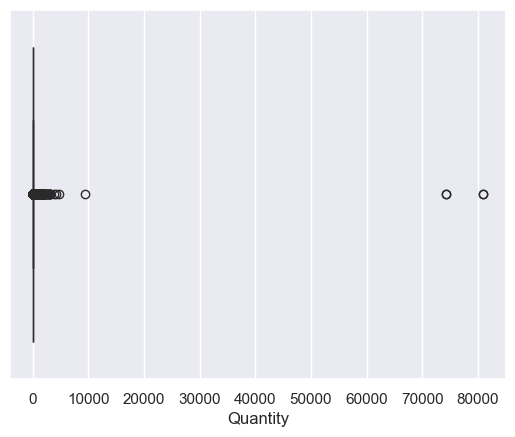

In [38]:
sns.boxplot(x ='Quantity', data= df, color ='darkblue')
plt.show()

In [39]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

In [40]:
IQR =Q3 -Q1
IQR

10.0

In [41]:
lower_lim = Q1  -1.5 * IQR
lower_lim

-13.0

In [42]:
upper_lim = Q3 +1.5 * IQR
upper_lim

27.0

Lets, replace the outlier values above 27.0 with the mean of the column.

In [43]:
for values in df['Quantity']:
    if values > 27.0:
        df['Quantity'] = df['Quantity'].replace(values, 13.37) #13.37 is mean

df['Quantity'].describe()        

C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\61397161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].replace(values, 13.37) #13.37 is mean


count    406789.000000
mean          7.379508
std           6.621142
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64

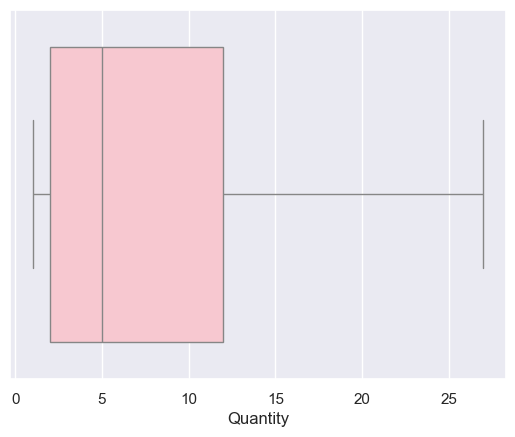

In [44]:
sns.boxplot(x ='Quantity', data =df, color ='pink')
plt.show()

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### For further analysis, let's extract the Year, Month and Date from the InvoiceDate column.

In [46]:
df['Year']= df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Date'] = df['InvoiceDate'].dt.day

C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\3752824954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']= df['InvoiceDate'].dt.year
C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\3752824954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month
C:\Users\lovis\AppData\Local\Temp\ipykernel_57840\3752824954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


In [48]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int32
Month                   int32
Date                    int32
dtype: object

### Let's perform grouped test for different columns for comparing our data.

### `Quantity vs Year`

In [49]:
df_gp_test1 = df[['Quantity', 'Year']]
gp_test1  =df_gp_test1.groupby(['Year'], as_index=False).mean()
gp_test1.head()


,Year,Quantity
0,2010,6.838503
1,2011,7.417736


[]

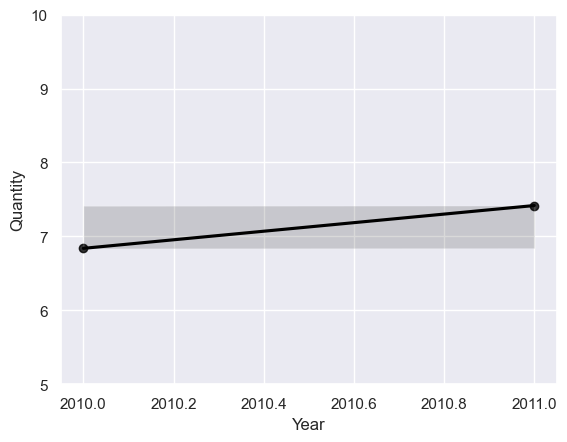

In [50]:
sns.regplot(x ='Year', y ='Quantity', data =gp_test1, color ='black')
plt.ylim(5,10)
plt.plot()

[]

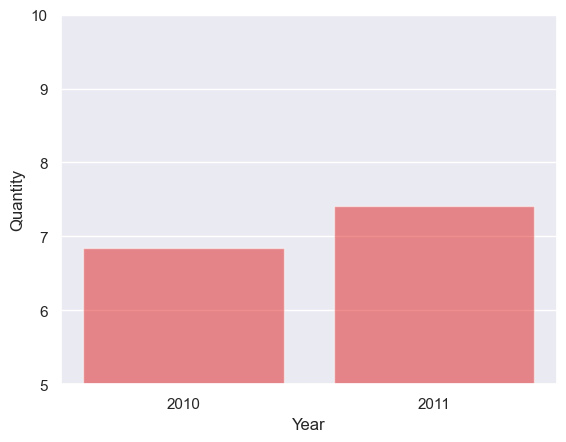

In [51]:
sns.barplot(x ='Year', y ='Quantity', data =gp_test1, color ='red', alpha =0.5)
plt.ylim(5,10)
plt.plot()

#### Note: The sold products quantity increased from the year 2010 to 2011. 

### `Quantity vs UnitPrice`

In [52]:
df_gp_test2 =df[['UnitPrice', 'Quantity']]
gp_test2 = df_gp_test2.groupby(['Quantity'], as_index= False).mean()
gp_test2.head()

,Quantity,UnitPrice
0,1.0,2.677654
1,2.0,2.778131
2,3.0,2.909397
3,4.0,3.099956
4,5.0,1.973703


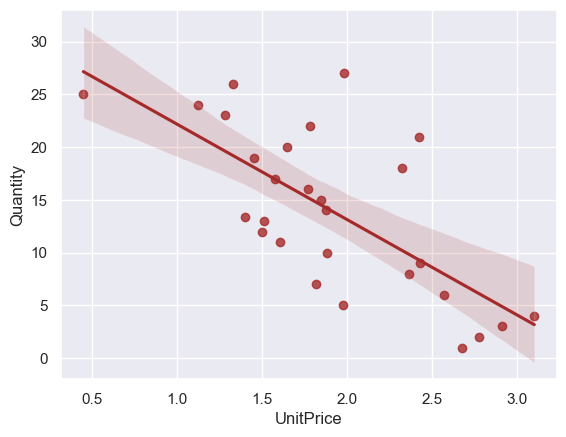

In [53]:
sns.regplot(x ='UnitPrice', y ='Quantity', data =gp_test2, color ='brown')
plt.show()

#### Note: As the UnitPrice increases the average  quantity  decreases.

### `Quantity vs Date`

In [54]:
df_gp_test3 =df[['Quantity','Date']]
gp_test3 = df_gp_test3.groupby(['Date'], as_index= False).mean()
gp_test3.head()

,Date,Quantity
0,1,7.449469
1,2,7.279075
2,3,7.179585
3,4,7.156152
4,5,7.230349


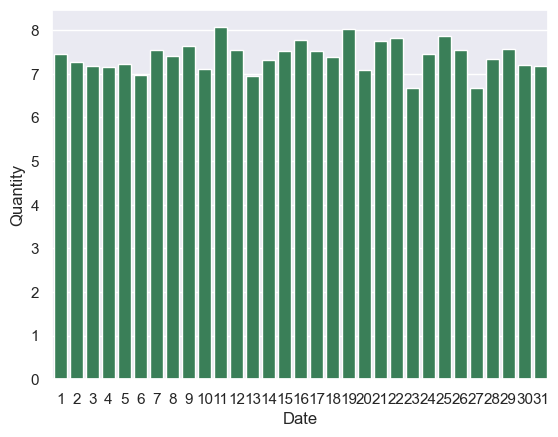

In [55]:
sns.barplot(x ='Date', y ='Quantity', data =gp_test3, color ='seagreen')
plt.show()

### `Quantity vs Month`

In [56]:
df_gp_test4 =df[['Quantity','Month']]
gp_test4 = df_gp_test4.groupby(['Month'], as_index= False).mean()
gp_test4

,Month,Quantity
0,1,7.520089
1,2,7.429322
2,3,7.316573
3,4,7.468007
4,5,7.665961
5,6,7.461190
6,7,7.874872
7,8,8.131980
8,9,8.131790
9,10,7.090006


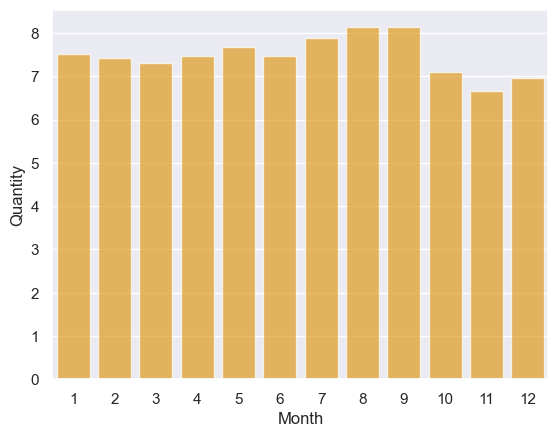

In [57]:
sns.barplot(x ='Month', y ='Quantity', data =gp_test4, color ='orange', alpha =0.7)
plt.show()

### `UnitPrice vs Year`

In [58]:
df_gp_test5 = df[['UnitPrice', 'Year']]
gp_test5 = df_gp_test5.groupby(['Year'], as_index=False).mean()
gp_test5

,Year,UnitPrice
0,2010,2.403136
1,2011,2.249640


#### Average UnitPrice decreses from $2.40 (2010) to $2.24 (2011). While Average Quantity sold increased from 6.8 (2010) to 7.4(2010). 
[Refer Quantity vs Year]

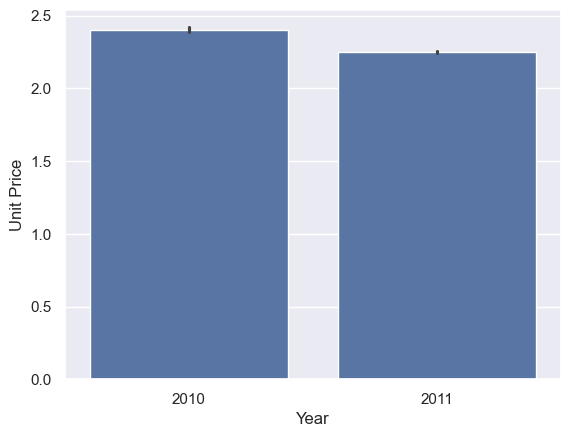

In [59]:
sns.barplot(y ='UnitPrice', x ='Year', data =df_gp_test5)
plt.ylabel("Unit Price")
plt.show()

### `UnitPrice vs Month`

In [60]:
df_gp_test6 = df[['UnitPrice', 'Month']]
gp_test6 = df_gp_test6.groupby(['Month'], as_index=False).mean()
gp_test6

,Month,UnitPrice
0,1,2.341626
1,2,2.342491
2,3,2.260848
3,4,2.232536
4,5,2.336111
5,6,2.271976
6,7,2.137250
7,8,2.191354
8,9,2.271686
9,10,2.285055


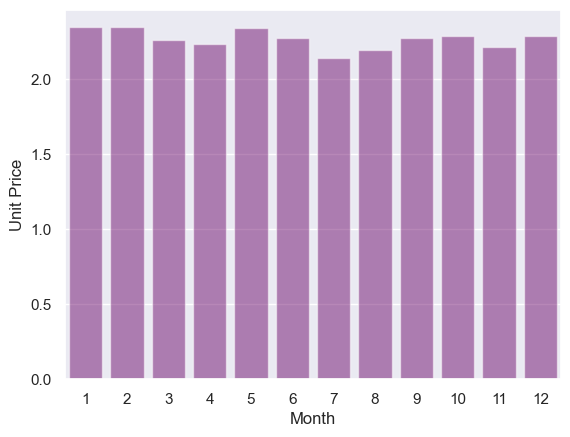

In [61]:
sns.barplot(y ='UnitPrice', x ='Month', data =gp_test6, color ='purple', alpha =0.5)
plt.ylabel("Unit Price")
plt.show()

### `UnitPrice vs Date`

In [62]:
df_gp_test7 = df[['UnitPrice', 'Date']]
gp_test7 = df_gp_test7.groupby(['Date'], as_index=False).mean()
gp_test7.head()

,Date,UnitPrice
0,1,2.286099
1,2,2.284356
2,3,2.354798
3,4,2.204347
4,5,2.224023


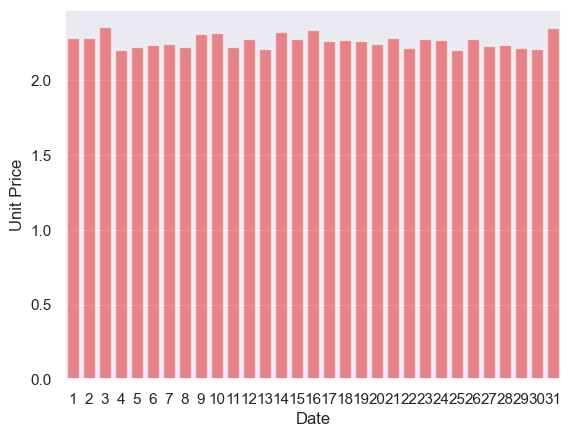

In [63]:
sns.barplot(y ='UnitPrice', x ='Date', data =gp_test7, color = 'red', alpha =0.5)
plt.ylabel("Unit Price")
plt.show()

In [64]:
df[['UnitPrice', 'Quantity']].describe()

,UnitPrice,Quantity
count,406789.000000,406789.000000
mean,2.259770,7.379508
std,1.515465,6.621142
min,0.001000,1.000000
25%,1.250000,2.000000
50%,1.950000,5.000000
75%,3.460000,12.000000
max,7.500000,27.000000


In [65]:
# df.to_csv("Retail Data Analysis Coursera.csv")

In [66]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Date'],
      dtype='object')

### `Quantity vs CustomerID`

In [67]:
df_gp_test8 = df[['Quantity', 'CustomerID']]
gp_test8 = df_gp_test8.groupby(['CustomerID'], as_index =False).mean()
gp_test8.head()


,CustomerID,Quantity
0,12346.0,13.370000
1,12347.0,11.232582
2,12348.0,13.863548
3,12349.0,8.023836
4,12350.0,11.588235


In [68]:
gp_test8.max()

CustomerID    18287.0
Quantity         25.0
dtype: float64

In [69]:
gp_test8.min()

CustomerID    12346.0
Quantity          1.0
dtype: float64

#### CustomerID 18287 placed maximum orders (25) while CustomerID 12346 placed minimum orders (1) between 2010 -2011.

In [70]:
df['Country'].value_counts().head()

Country
United Kingdom    361854
Germany             9493
France              8490
EIRE                7483
Spain               2532
Name: count, dtype: int64

In [71]:
df['Country'].value_counts().tail()

Country
Lithuania         35
Brazil            32
Czech Republic    30
Bahrain           17
Saudi Arabia      10
Name: count, dtype: int64

#### Maximun units were sold in the Country **United Kingdom** followed by Germany and France, while least number of units were sold in the country **Saudi Arabia** and Bahrain. It suggests that, company is performing well in the European region but it needs to expand its business in Middle-East countries.

## Steps Involved and Key Findings from the dataset:

### Steps Involved in Analysing the retail data.

1: Imported the required modules.

2: Read the excel file data into Pandas dataframe.

3: Checked for any missing data in the dataset.We found that there were 135080 empty cells in CustomerID column and 1454 missing enteries for DEscription column. Then I replaced the empty values with np.NaN values and drop the rows containing NaN values. 

4:Next I checked for any duplicate value in our dataset and dropped the duplicated using drop_duplicates() function.

5: Then, I replaced the negative values in "Quantity" Column and changed them to positive values using .abs() function.

6: I found that there were few transections with UnitPrice =0.000. We need to drop these entries from our dataset as unitprice can not be zero or negative.

7: Next I removed the outliers from columns "UnitPrice" and "Quantity".

8: For further analysis, I extracted the Year, Month and Date from the InvoiceDate column and added them as separate columns to our dataset.

9: Then I performed grouped test analysis for Quantity vs Year, Month and Date and later performed the grouped tests for UnitPrice vs Year, Month and Date and plotted the imporatnt findings. 

10: Then I extracted important information after plotting a RegPlot of UnitPrice and Quantity. 

11: In the end I checked for which CustomerId placed maximum and minimum orders between 2010 and 2011. 

12: In the last, I figured out the countries where maximum and minimum number of orders were placed. 

#### Given below is a combined plot providind important insights of our findings.

![alt text](<Retail Data- Combined Plots-1.jpg>)

### Key Findings from the dataset and Way Forward for the Stakeholders:

1: The regplot of Quantity and UnitPrice revealed that as the UnitPrice increases, the average  quantity of sold items decreases.The products sales increased from 2010 to 2011 due to fall in average unitprice of items. Hence, the Retail company should focus on maintaning the right price keeping in mind the demand of items.

2:Maximun units were sold in the Country **United Kingdom** followed by Germany and France, while least number of units were sold in the country **Saudi Arabia** and Bahrain. It suggests that, The retail company has established well in UK and is performing well in the European region but it needs to expand its business in Middle-East countries.

3: CustomerID 18287 placed maximum orders (avg=25) while CustomerID 12346 placed minimum orders (1) between 2010 -2011.

4: Date-wise comparison of UnitPrice and Sales(Quantity) provided that the UnitPrice remained constant throughout the month, though it was higher on the last date of the month and on 3rd day of the month, which led to low sales on these dates. People purchased more units on 11th and 19th day of the month while the sales were significantly low on 23rd and 27th day of the Month. 

5: Monthly Comparison of UnitPrice and Quantity provided that the UnitPrice is least in the month of July -August which lead to higher sales in those months. As the UnitPrice consistently increased September onwords,the sales decreased significantly. Quantity of items sold was least in the month of November and December. The company should keep their prices low in Nov-Dec to enhance it's sales. 






